In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from scipy import stats
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from collections import Counter

In [2]:
pd.set_option("display.max_columns",500)

In [3]:
f_names = []
with open("./question3/adult.names",'r') as f:
    for line in f.readlines():
        if '|'!= line[0] and ':' in line:
            f_names.append(line.split(":")[0])

In [4]:
f_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [5]:
##reading data
names =f_names.copy()
names.append("target")
train = pd.read_csv("./question3/adult.data",header=None,names = names)

In [6]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
train.target = train.target.map({" <=50K":0," >50K":1}) ##use map to map values

In [8]:
numeric_f = list(train[f_names].select_dtypes(include=[np.number]).columns)

In [9]:
cate_f =  list(train[f_names].select_dtypes(exclude=[np.number]).columns)

In [10]:
train.groupby("target").aggregate("mean")[numeric_f]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
target,,,,,,
0,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
1,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [11]:
def percentage(x):
    count = (x==1).sum()
    total = len(x)
    return count/total

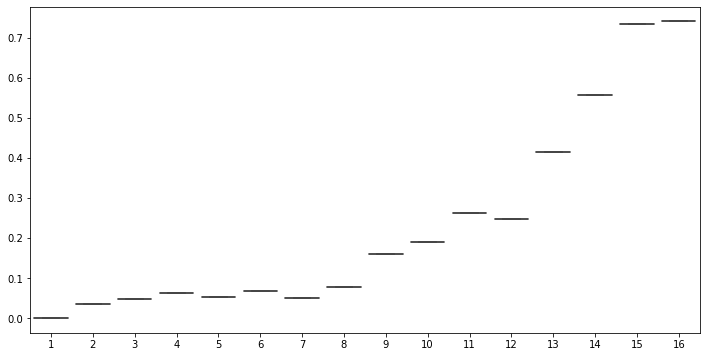

In [12]:
fig = plt.figure(figsize=(12,6))
data = train.groupby("education-num").aggregate(percentage)
box_x = list(data.index)
box_y = list(data.target)
sn.boxplot(x=box_x,y=box_y)

In [13]:
train_x = pd.get_dummies(train[f_names])
train_y = train.target
print(train_x.shape,train_y.shape)

(32561, 108) (32561,)


In [14]:
train.apply(lambda x: x.isna().sum()/(x.count()),axis=0)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
target            0.0
dtype: float64

## Modeling

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import f1_score

In [16]:
dt = DecisionTreeClassifier()

In [17]:
nb = GaussianNB()

In [18]:
dt_f1 = cross_val_score(dt,train_x,train_y,scoring='f1_macro',cv=5)##desicion tree 

In [19]:
print("average f1 score: {}\n f1 std {}".format(dt_f1.mean(),dt_f1.std()))

average f1 score: 0.7469940819179096
 f1 std 0.0052619663542166194


In [20]:
nb_f1 = cross_val_score(nb,train_x,train_y,scoring='f1_macro',cv=5)

In [21]:
print("average f1 score: {}\n f1 std {}".format(nb_f1.mean(),nb_f1.std()))

average f1 score: 0.6488118165519923
 f1 std 0.005634473514724955


In [22]:
##decision tree is better in the validation

In [23]:
dt.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
nb.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
test = pd.read_csv("./question3/adult.test",header = 'infer',skiprows = [0],names = names)
# test.columns = names
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [26]:
test_x = test[f_names]
ground_truth = test.target.map({" <=50K.":0," >50K.":1})

In [27]:
test_x.shape

(16281, 14)

In [28]:
test_x = pd.get_dummies(test_x)

In [29]:
test_x.shape

(16281, 107)

In [30]:
train_x.shape

(32561, 108)

In [31]:
set(train_x.columns)-set(test_x.columns)

{'native-country_ Holand-Netherlands'}

In [32]:
test_x['native-country_ Holand-Netherlands'] = np.zeros(test_x.shape[0])

In [33]:
dt_preds = dt.predict(test_x)

In [34]:
dt_f1 = f1_score(y_true=ground_truth,y_pred=dt_preds,average='macro')
report = classification_report(y_true=ground_truth,y_pred=dt_preds)
print("Macro F1 of decision Tree {}".format(dt_f1))
print(report)

Macro F1 of decision Tree 0.7268925679075517
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     12435
           1       0.57      0.60      0.59      3846

    accuracy                           0.80     16281
   macro avg       0.72      0.73      0.73     16281
weighted avg       0.80      0.80      0.80     16281



In [35]:
nb_preds = nb.predict(test_x)

In [36]:
nb_f1 = f1_score(y_true=ground_truth,y_pred=nb_preds,average='macro')
report = classification_report(y_true=ground_truth,y_pred=nb_preds)
print("Macro F1 of decision Tree {}".format(nb_f1))
print(report)

Macro F1 of decision Tree 0.645018168365205
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.64      0.30      0.41      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.63      0.65     16281
weighted avg       0.77      0.80      0.77     16281

